Purpose of this file is to provide some graphs that could be helpful for guaging 
what is going on in the energy sector

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd 
import requests
import functions as fns
import datetime

In [2]:
# first we will be loading in our api key from a text file
api_key = fns.get_api_key(txt_file='eia_api_key.txt', key_loc=1)
print(api_key)

successfully grabbed you API Key
OpUp3g2fyrT6fG33paK5YStYzXtagweyUWmdfQEz


In [3]:
# the first graph we will be focusing on is a figure tracking world
# supply and demand balance. below are the series ids
world_list_1 = ['PAPR_WORLD', 'PATC_WORLD']

# setting up a start date
start = '2000-01'

# creating a save path for our data
save_date = datetime.date.today().strftime("%Y_%m")

# where we will be storing our data
save_path = f'output/popular_visuals/world_data_1_{save_date}.csv'

# we will be converting series topics into dataframs
world_data_1 = fns.series_to_dataframe(series_list=world_list_1, start_date=start, 
                                       save_path=save_path, key=api_key)

# printing out the info on the dataframe we just collected
print(world_data_1.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 624 entries, 0 to 623
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   period             624 non-null    datetime64[ns]
 1   seriesId           624 non-null    object        
 2   seriesDescription  624 non-null    object        
 3   value              624 non-null    float64       
 4   unit               624 non-null    object        
 5   forecast_period    624 non-null    datetime64[ns]
dtypes: datetime64[ns](2), float64(1), object(3)
memory usage: 29.4+ KB
None


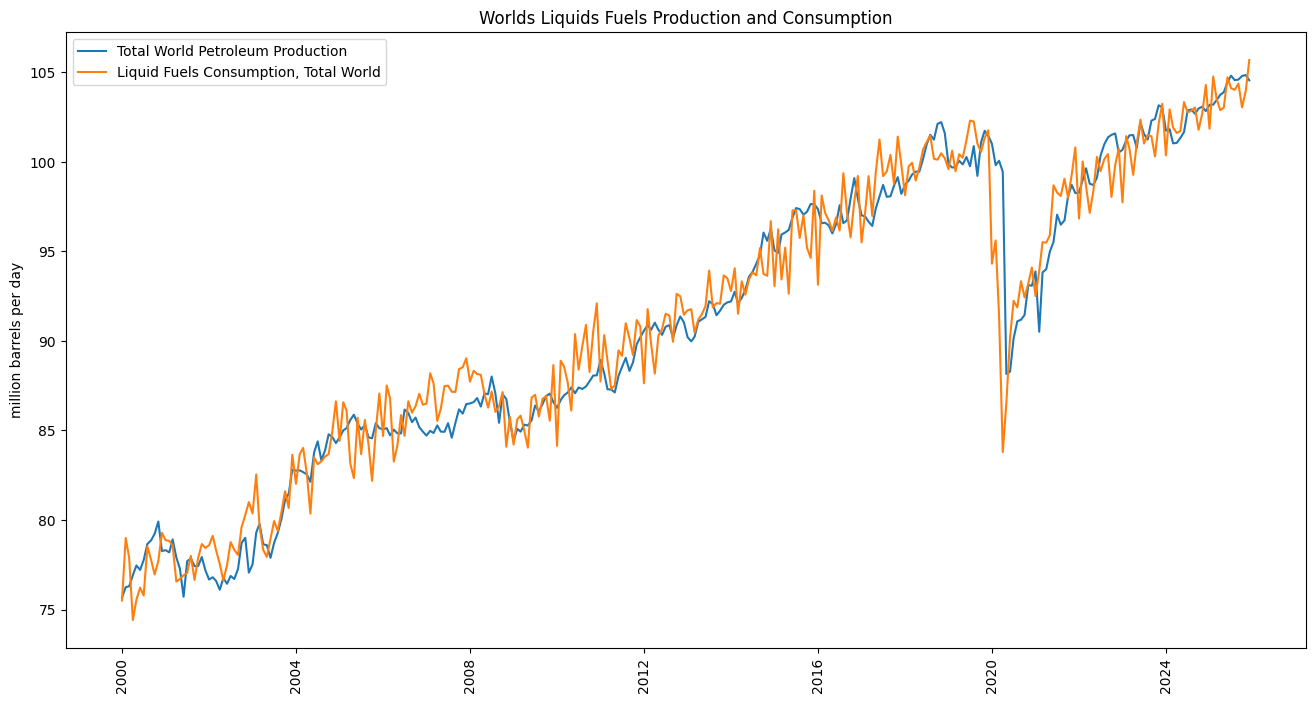

In [4]:
# now we are going to visualize our data
fns.gimme_lineplot(dataframe=world_data_1, 
                   title='Worlds Liquids Fuels Production and Consumption')

In [5]:
# let's now pivot our data into a table that we can use to calculate deviations 
world_table_1 = world_data_1.pivot(columns='seriesId', 
                                   values='value', 
                                   index=['period', 'forecast_period'])

# outputting our world table so that we can check if we created it correcty
print(world_table_1)

world_table_1.to_csv('output/popular_visuals/test.csv')


seriesId                    PAPR_WORLD  PATC_WORLD
period     forecast_period                        
2000-01-01 2024-03-01        75.670286   75.512894
2000-02-01 2024-03-01        76.253410   79.000020
2000-03-01 2024-03-01        76.302574   77.886630
2000-04-01 2024-03-01        76.920923   74.418631
2000-05-01 2024-03-01        77.465357   75.555657
...                                ...         ...
2025-08-01 2024-03-01       104.556980  104.015171
2025-09-01 2024-03-01       104.590103  104.363874
2025-10-01 2024-03-01       104.788612  103.038106
2025-11-01 2024-03-01       104.840305  103.933155
2025-12-01 2024-03-01       104.548793  105.679880

[312 rows x 2 columns]


In [6]:
# now we are adding a colum to our dataframe where we calculate deviation 
world_table_1['Net Balance'] = world_table_1.iloc[:, 0] - world_table_1.iloc[:, 1]

# resetting my index so that the period is now a col instead of an index
world_table_1 = world_table_1.reset_index()

# let's see the output of our data
print(world_table_1.info())

# outputting world table data into its own csv
world_table_1.to_csv('output/popular_visuals/test.csv', index=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 312 entries, 0 to 311
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   period           312 non-null    datetime64[ns]
 1   forecast_period  312 non-null    datetime64[ns]
 2   PAPR_WORLD       312 non-null    float64       
 3   PATC_WORLD       312 non-null    float64       
 4   Net Balance      312 non-null    float64       
dtypes: datetime64[ns](2), float64(3)
memory usage: 12.3 KB
None


In [7]:
# now let's melt our data
world_melted_1 = pd.melt(frame=world_table_1, id_vars=['period', 'forecast_period'])

print(world_melted_1)

# outputting
world_melted_1.to_csv('output/popular_visuals/world_net_demand_march_2024.csv')




        period forecast_period     seriesId      value
0   2000-01-01      2024-03-01   PAPR_WORLD  75.670286
1   2000-02-01      2024-03-01   PAPR_WORLD  76.253410
2   2000-03-01      2024-03-01   PAPR_WORLD  76.302574
3   2000-04-01      2024-03-01   PAPR_WORLD  76.920923
4   2000-05-01      2024-03-01   PAPR_WORLD  77.465357
..         ...             ...          ...        ...
931 2025-08-01      2024-03-01  Net Balance   0.541810
932 2025-09-01      2024-03-01  Net Balance   0.226229
933 2025-10-01      2024-03-01  Net Balance   1.750506
934 2025-11-01      2024-03-01  Net Balance   0.907150
935 2025-12-01      2024-03-01  Net Balance  -1.131087

[936 rows x 4 columns]


<Axes: xlabel='period', ylabel='value'>

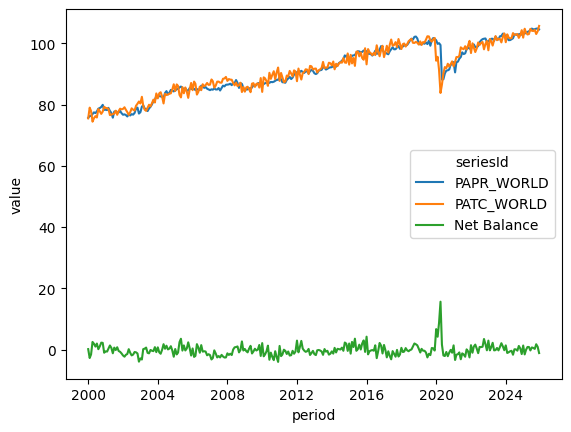

In [8]:
# now let's visualize our graph
sns.lineplot(data=world_melted_1, x='period', y='value', hue='seriesId')

(array([17532., 17897., 18262., 18628., 18993., 19358., 19723., 20089.,
        20454.]),
 [Text(17532.0, 0, '2018'),
  Text(17897.0, 0, '2019'),
  Text(18262.0, 0, '2020'),
  Text(18628.0, 0, '2021'),
  Text(18993.0, 0, '2022'),
  Text(19358.0, 0, '2023'),
  Text(19723.0, 0, '2024'),
  Text(20089.0, 0, '2025'),
  Text(20454.0, 0, '2026')])

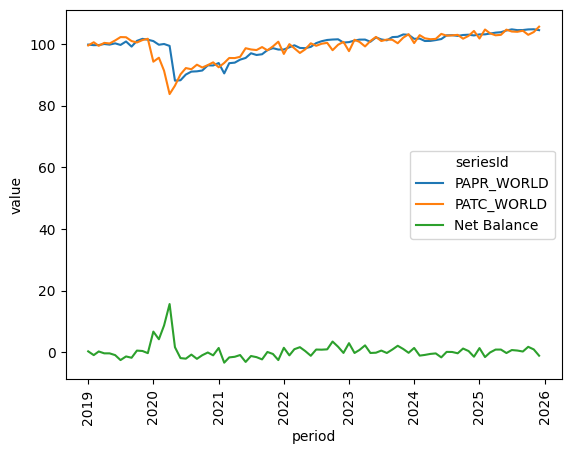

In [32]:
# now let's look at the past 5 years only
five_year_net_balance = world_melted_1[world_melted_1['period']>='1/1/2019']

sns.lineplot(data=five_year_net_balance, x='period', y='value', hue='seriesId')
plt.xticks(rotation=90)



now we are moving to the next graph, which is tracking changes in net generation
by region, select states and generation source

In [24]:
# setting up the code for our specific graphs
usa_elec_gen_1 = ["BAEPCGW_US",
                  "CLEPCGW_US",
                  "GEEPCGW_US",
                  "HPEPCGW_US",
                  "HVEPCGW_US",
            "NGEPCGW_US",
            "NUEPCGW_US",
            "OGEPCGW_US",
            "OTEPCGW_US",
            "OWEPCGW_US",
            "PAEPCGW_US",
            "SOEPCGWX_US",
            "SPEPCGWX_US",
            "STEPCGW_US",
            "WNEPCGW_US",
            "WWEPCGW_US",
]


interesting_topics = ['BAEPGW_US', 'NGEPCGW_US', 'SPEPCGWX_US', 'WNEPCGW_US', 'CLEPCGW_US']

# tryin out our function that we just created
us_elec_gen_df = fns.pop_visual(series_list=usa_elec_gen_1, start_date='2000-01', 
                                api_key=api_key, figure_name='power_sector_gen_cap')


In [10]:
print(us_elec_gen_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3072 entries, 0 to 3071
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   period             3072 non-null   datetime64[ns]
 1   seriesId           3072 non-null   object        
 2   seriesDescription  3072 non-null   object        
 3   value              3072 non-null   float64       
 4   unit               3072 non-null   object        
 5   forecast_period    3072 non-null   datetime64[ns]
dtypes: datetime64[ns](2), float64(1), object(3)
memory usage: 144.1+ KB
None


In [15]:
# need to import seaborn objects to get area plot set up
import seaborn.objects as so

from seaborn import axes_style


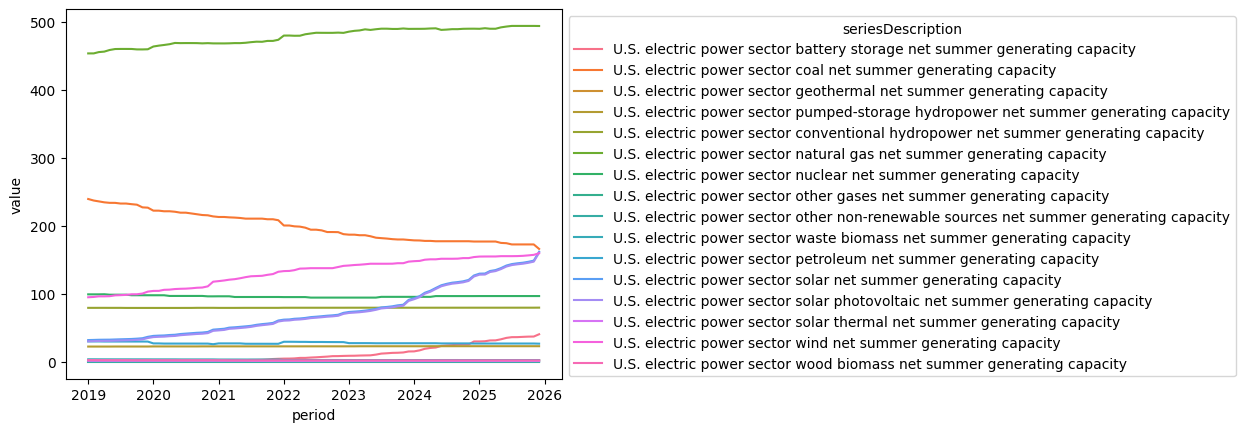

In [23]:
# first let's view the data as a line plot starting in 2019
five_year_df = us_elec_gen_df[us_elec_gen_df['period'] >= '1/1/2019']

# plotting our data now
ax = sns.lineplot(data=five_year_df, x='period', y='value', hue='seriesDescription')

# moving our legend away from the plot itself
sns.move_legend(ax, 'upper left', bbox_to_anchor=(1, 1))

'''
these are the series ids with the most notable changes

natural gas
coal 
solar photovoltaic
wind
battery storage

'''

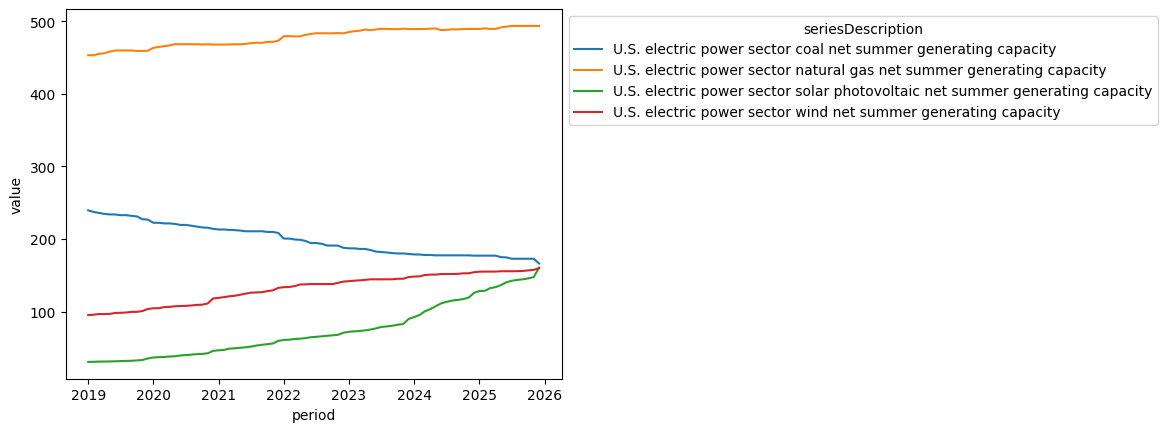

In [25]:
# now let's condense to these 
interesting_topics = ['BAEPGW_US', 'NGEPCGW_US', 'SPEPCGWX_US', 'WNEPCGW_US', 'CLEPCGW_US']

interesting_df = five_year_df[five_year_df['seriesId'].isin(interesting_topics)]

ax = sns.lineplot(data=interesting_df, x='period', y='value', hue='seriesDescription')
sns.move_legend(ax, 'upper left', bbox_to_anchor=(1, 1))


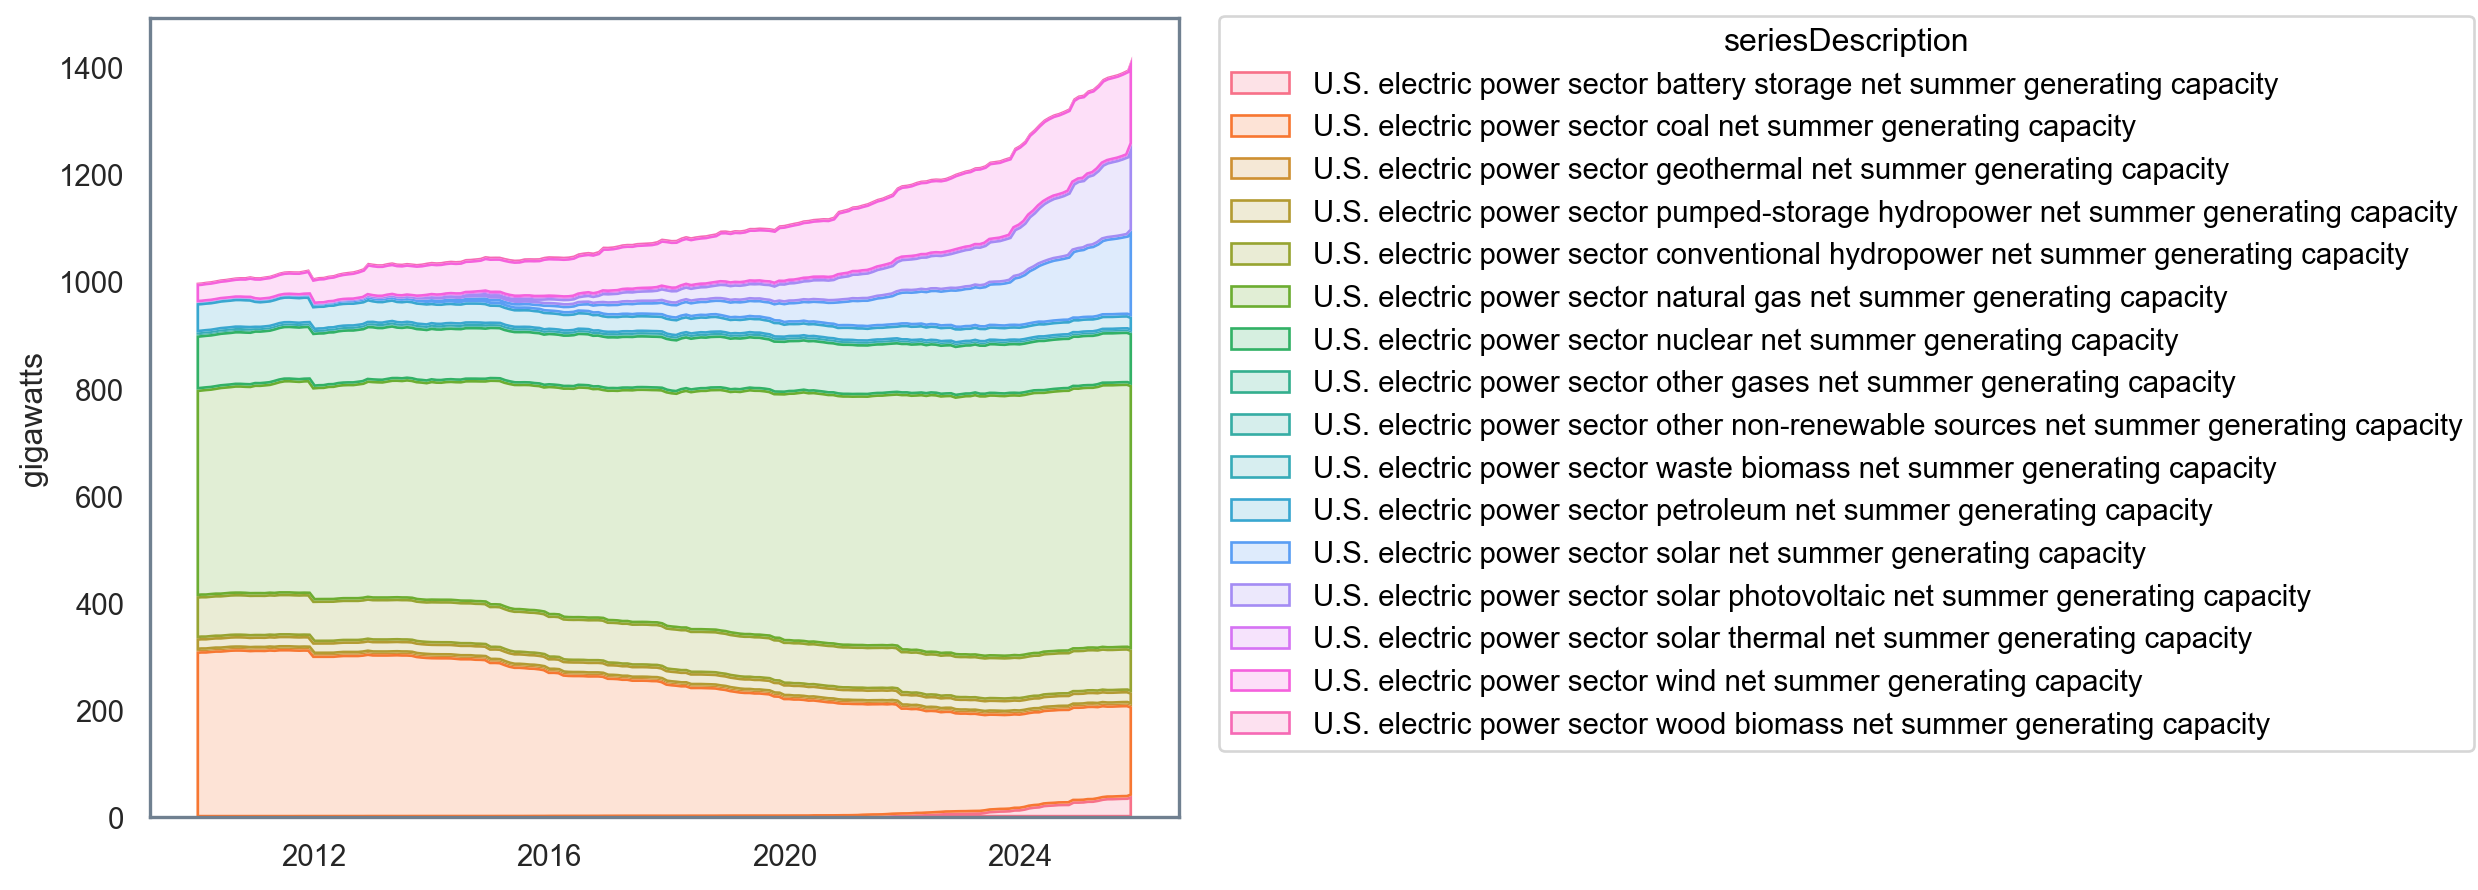

In [19]:
theme_dict = {**axes_style("white"), "axes.edgecolor":"slategray"}
so.Plot.config.theme.update(theme_dict)

plot = (
    so.Plot(us_elec_gen_df, x='period', y='value').add(so.Area(), so.Stack(), 
                                                       color='seriesDescription')
)

# adding our labels
plot.label(x=None, y=us_elec_gen_df['unit'][0])